In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [8]:
df = pd.read_csv(r"Sample_Store.csv",header=0,index_col=None)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
#Dimension of the dataset
df.shape

(9994, 13)

In [11]:
#Null values 
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#Information about the datset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
#Summary [mean, mdeian, Standard deviation, Minimum, Maximum]
df.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [15]:
#Dropping postal code variable 
df.drop(['Postal Code'],axis=1,inplace=True)

In [17]:
"""
Pandas Profiling
import pandas_profiling as pf
profile = pf.ProfileReport(df)
profile
"""

<AxesSubplot:>

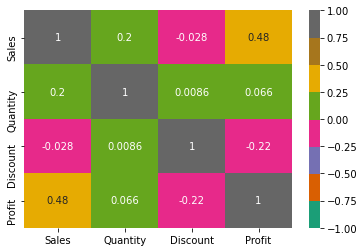

In [21]:
#Coorelation 
cor_heat_map = df.corr()
sns.heatmap(cor_heat_map,annot=True,cmap='Dark2',vmax=1.0,vmin=-1.0)

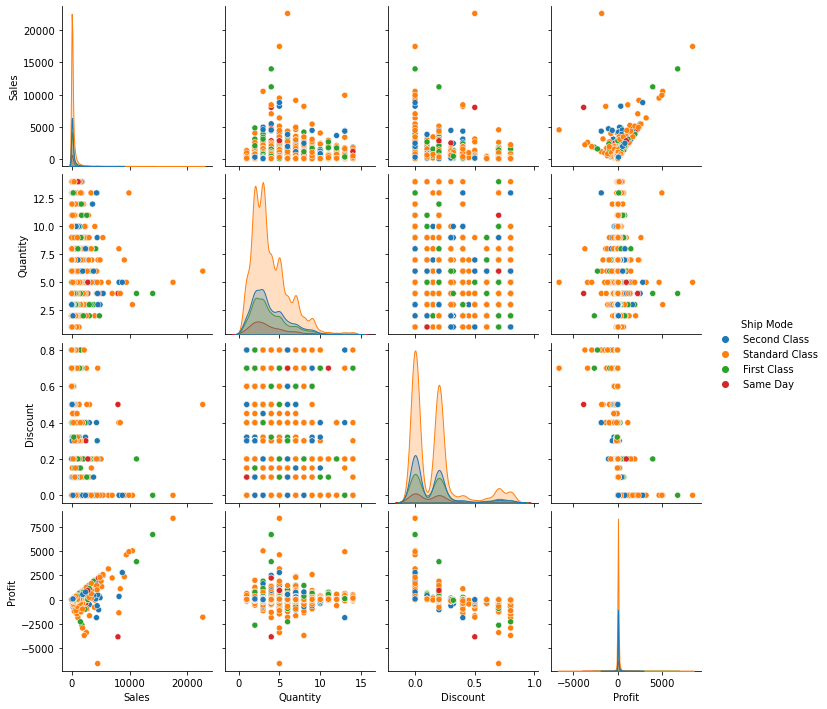

In [23]:
#Pairplot 
sns.pairplot(df,hue="Ship Mode")

In [40]:
#Subsetting Categorical Variables 
colname = df.columns
obj = []
for i in colname:
    if (df[i].dtype=='object'):
        obj.append(i)
        
obj

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

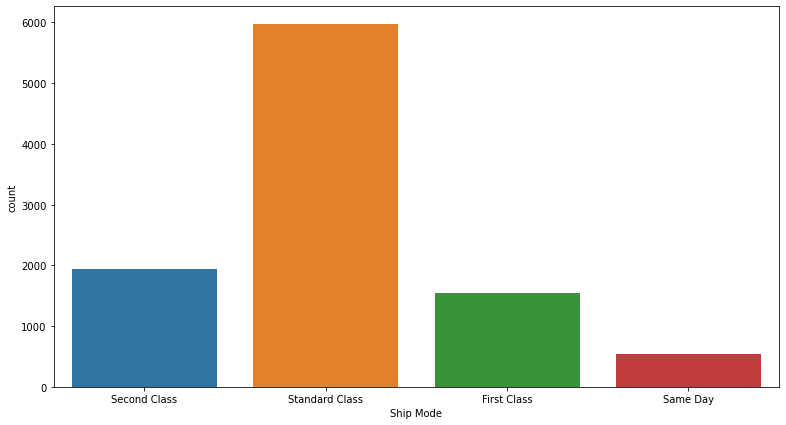

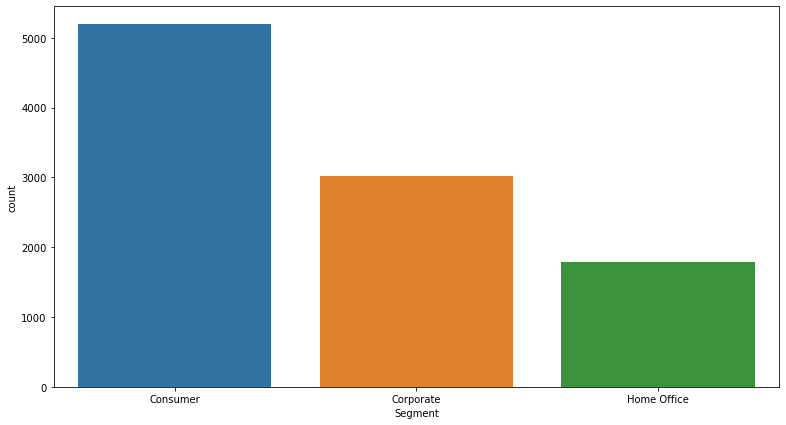

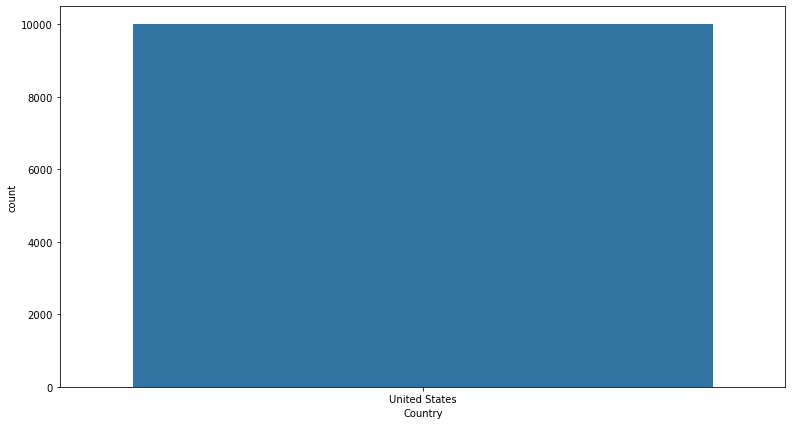

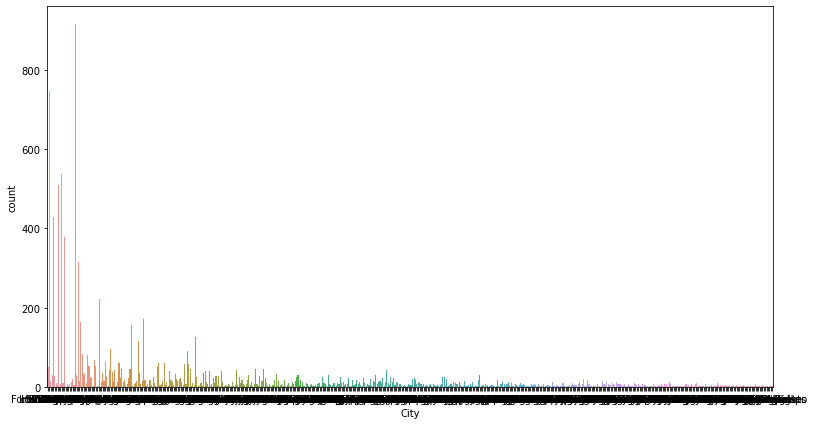

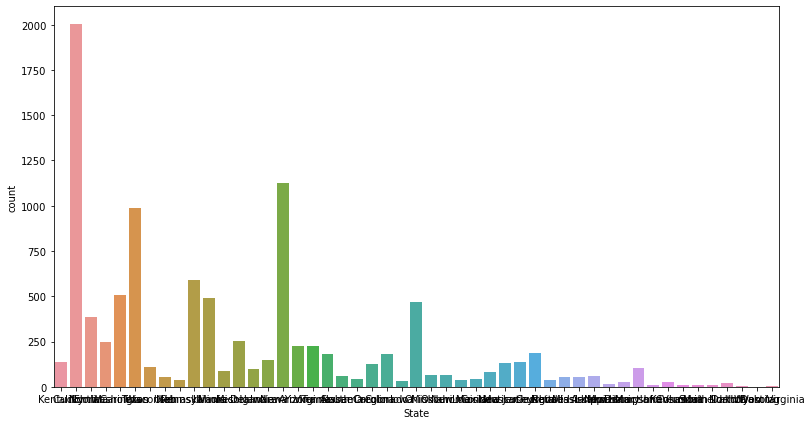

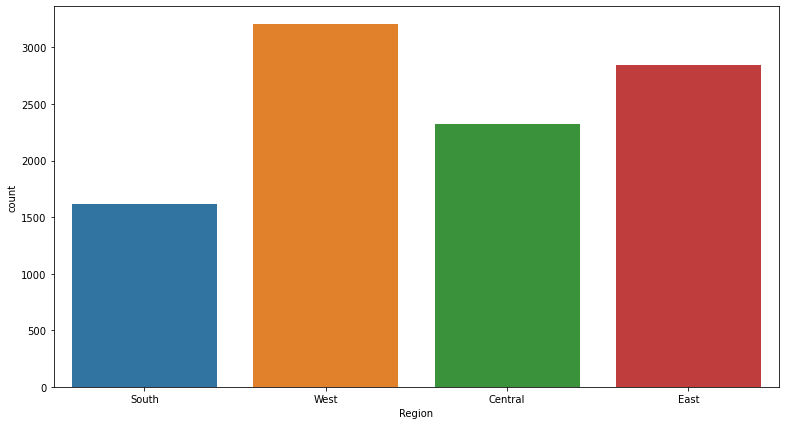

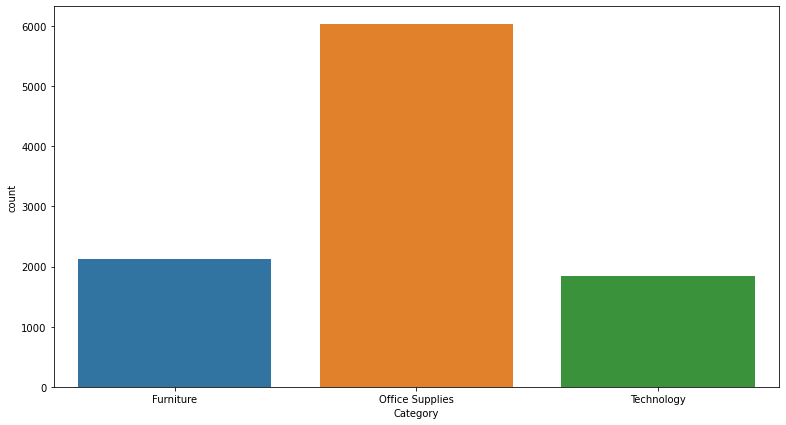

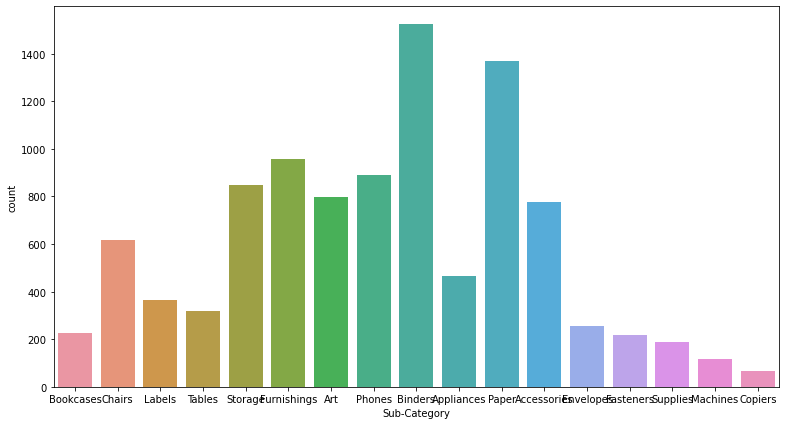

In [42]:
#Value Count for Categorical Variables 
for i in obj:
    plt.figure(figsize=(13,7))
    sns.countplot(x=df[i])

Observation : Sales, Discount and profit across regions and category wise

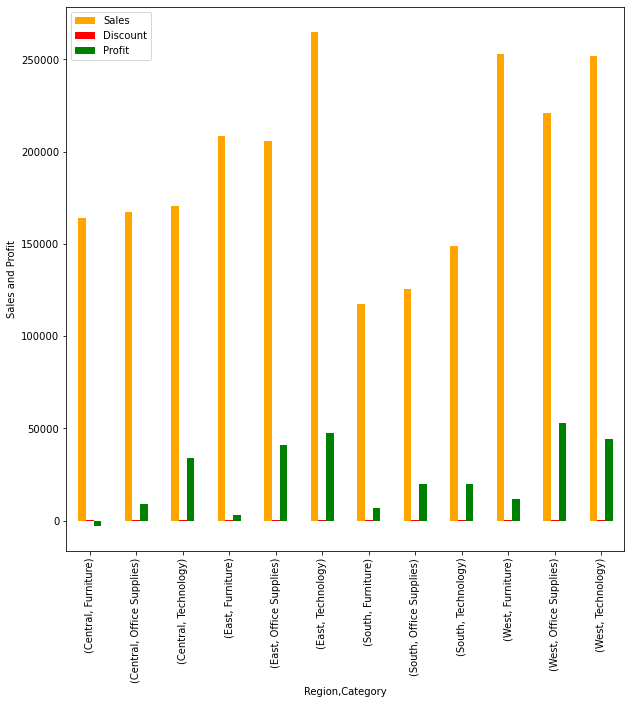

In [54]:
df.groupby(['Region','Category'])[['Sales','Discount','Profit']].sum().plot.bar(color=['orange','red','green'],figsize=(10,10))
plt.ylabel('Sales and Profit')
plt.show()

In [45]:
colname

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Observation: Sales and profit across states

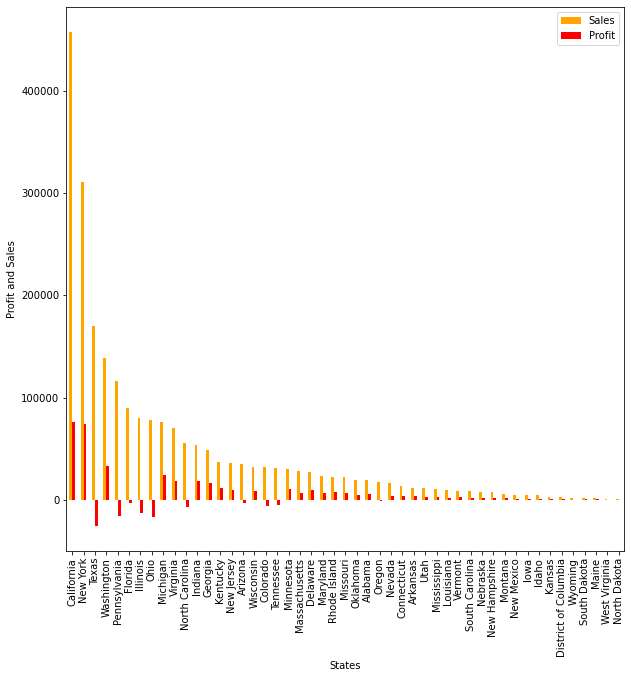

In [47]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['orange','red'],figsize=(10,10))
plt.xlabel('States')
plt.ylabel('Profit and Sales')
plt.show()

As a business manager, try to find out the weak areas where you can work to make more profit.
What all business problems you can derive by exploring the data?

1] Region wise sales and profit can be improved simultaneously if proper discount is offered.
2]Sales and profit are positively corelated, if the selling price is adjusted at a proper market value, maximum profits can be made from from regions where sales is high, but, profit is less.
3]Copiers, Machines, suppliers, Fasteners, Bookcases are 5 bottom most sub-categories provided with discount offers.
